### Import libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms
from scipy import stats
import copy
import random

In [2]:
import math
import scipy.stats as ss
from scipy.stats import mode
from collections import Counter

In [3]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer

In [5]:
from sklearn.model_selection import StratifiedShuffleSplit
from xgboost import XGBClassifier
from sklearn.calibration import calibration_curve
from sklearn.calibration import CalibratedClassifierCV

In [6]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.utils import class_weight

### Read dataset

In [7]:
df = pd.read_csv('covtype.csv')
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


### Split data an preprocessing

In [8]:
df.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40

In [17]:
class_1_df = df[df['Cover_Type']==1]
class_2_df = df[df['Cover_Type']==2]
class_3_df = df[df['Cover_Type']==3]
class_4_df = df[df['Cover_Type']==4]
class_5_df = df[df['Cover_Type']==5]
class_6_df = df[df['Cover_Type']==6]
class_7_df = df[df['Cover_Type']==7]
print(len(class_1_df),len(class_2_df),len(class_3_df),len(class_4_df),len(class_5_df),len(class_6_df),len(class_7_df))

211840 283301 35754 2747 9493 17367 20510


In [18]:
2747*0.2

549.4

In [29]:
test_class_1_df = df[df['Cover_Type']==1].sample(500)
test_class_2_df = df[df['Cover_Type']==2].sample(500)
test_class_3_df = df[df['Cover_Type']==3].sample(500)
test_class_4_df = df[df['Cover_Type']==4].sample(500)
test_class_5_df = df[df['Cover_Type']==5].sample(500)
test_class_6_df = df[df['Cover_Type']==6].sample(500)
test_class_7_df = df[df['Cover_Type']==7].sample(500)
test_df = pd.concat([test_class_1_df,
                     test_class_2_df,
                     test_class_3_df,
                     test_class_4_df,
                     test_class_5_df,
                     test_class_6_df,
                     test_class_7_df])
print(len(test_df))

3500


In [28]:
train_class_1_df = class_1_df.drop(test_class_1_df.index)
train_class_2_df = class_2_df.drop(test_class_2_df.index)
train_class_3_df = class_3_df.drop(test_class_3_df.index)
train_class_4_df = class_4_df.drop(test_class_4_df.index)
train_class_5_df = class_5_df.drop(test_class_5_df.index)
train_class_6_df = class_6_df.drop(test_class_6_df.index)
train_class_7_df = class_7_df.drop(test_class_7_df.index)
train_df = pd.concat([train_class_1_df,
                     train_class_2_df,
                     train_class_3_df,
                     train_class_4_df,
                     train_class_5_df,
                     train_class_6_df,
                     train_class_7_df])
print(len(train_df))

577512


In [30]:
data = pd.concat([train_df,test_df])

In [31]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(),['Elevation', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon',
       'Horizontal_Distance_To_Fire_Points','Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40'])
    ]
)

data_preprocessed = preprocessor.fit_transform(data)
labels = np.array(data['Cover_Type'])

In [32]:
data_preprocessed[0]

array([-9.30092228e-01, -1.48277671e+00, -1.26754849e+00, -7.96325165e-01,
       -1.63107730e-01,  3.19623221e-02,  5.40359169e-01,  3.67963773e+00,
        1.10805671e+00, -2.32834408e-01, -8.79502509e-01, -2.60503473e-01,
       -7.24402892e-02, -1.14687763e-01, -9.12990534e-02, -1.47521407e-01,
       -5.23512444e-02, -1.06788264e-01, -1.34443975e-02, -1.75058816e-02,
       -4.44752360e-02, -2.44006205e-01, -1.47819550e-01, -2.33216171e-01,
       -1.75751995e-01, -3.20982720e-02, -2.27231846e-03, -7.00982966e-02,
       -7.72651355e-02, -5.72336256e-02, -8.35427089e-02,  7.85301411e+00,
       -3.79597426e-02, -2.46848066e-01, -3.32260730e-01, -1.94939745e-01,
       -2.85440025e-02, -6.70193444e-02, -4.32541921e-02, -4.03837703e-02,
       -4.97475096e-01, -2.33965938e-01, -2.15036564e-01, -3.15145637e-01,
       -2.90322440e-01, -5.28284220e-02, -5.72638872e-02, -1.42525495e-02,
       -2.26150058e-02, -1.65967066e-01, -1.55903981e-01, -1.23732435e-01])

In [33]:
data_preprocessed.shape

(581012, 52)

In [35]:
X_train = data_preprocessed[:577512,:]
y_train = labels[:577512]
X_test = data_preprocessed[577512:,:]
y_test = labels[577512:]

In [37]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(577512, 52)
(577512,)
(3500, 52)
(3500,)


### Train model

In [67]:
params = {
    "model_name": "xgboost",
    "early_stopping_rounds": 100,
    "eval_metric": ["merror", "mlogloss"],
    "hyperparams": {
        "verbosity": 0, 
        "silent": 0, 
        "objective": "multi:softmax", 
        "n_jobs": 1, 
        "gamma": 10,              
        "max_delta_step": 0, 
        "subsample": 0.8,           
        "colsample_bytree": 0.8,         
        "colsample_bylevel": 1,  
        "colsample_bynode": 0.8,         
        "n_estimators": 200,           
        "reg_lambda": 1, 
        "random_state": 0, 
        "seed": 0, 
        "missing": None, 
        "reg_alpha":  0,            
        "base_score": 0.5,              
        "max_depth": 5,           
        "min_child_weight": 1,          
        "booster": "gbtree" ,
        "learning_rate": 0.3,  
        "tree_method": "gpu_hist",
        "num_parallel_tree": 6,
        "gpu_id": 0
    }
}

In [68]:
model = XGBClassifier()
model.set_params(**params['hyperparams'])

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=0.8, colsample_bytree=0.8, gamma=10, gpu_id=0,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.3, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, monotone_constraints=None,
              n_estimators=200, n_jobs=1, num_parallel_tree=6,
              objective='multi:softmax', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, seed=0, silent=0,
              subsample=0.8, tree_method='gpu_hist', validate_parameters=None,
              verbosity=0)

In [72]:
splits = 10
cv = StratifiedShuffleSplit(n_splits=splits, test_size=0.3, random_state=42)
accuracy = np.zeros((splits,2))

count = 0
for train, val in cv.split(X_train, y_train):
    train_features = X_train[train]
    train_labels = y_train[train]
    validation_features = X_train[val]
    validation_labels = y_train[val]
    eval_set = [(X_train[train], y_train[train]),(X_train[val], y_train[val])]
    
    class_weights = list(class_weight.compute_class_weight('balanced',
                                             np.unique(y_train[train]),
                                             y_train[train]))
    w_array = np.ones(y_train[train].shape[0], dtype = 'float')
    for i, val in enumerate(y_train[train]):
        w_array[i] = class_weights[val-1]
    
    model = model.fit(X_train[train], y_train[train], early_stopping_rounds=params['early_stopping_rounds'], 
                  eval_metric=params['eval_metric'], eval_set=eval_set, sample_weight=w_array, verbose=False)
    
    train_model_prediction = model.predict(train_features)
    train_predictions = [round(value) for value in train_model_prediction]
    train_accuracy = accuracy_score(train_labels, train_predictions)
    print('train_accuracy for iteration ', count+1, ': ', train_accuracy)
    
    val_model_prediction = model.predict(validation_features)
    val_predictions = [round(value) for value in val_model_prediction]
    val_accuracy = accuracy_score(validation_labels, val_predictions)
    print('val_accuracy for iteration ', count+1, ': ', val_accuracy)

    accuracy[count] = [train_accuracy, val_accuracy]
    count += 1

print('Train accuracy: ', np.mean(accuracy[0,:]))
print('Validation accuracy: ', np.mean(accuracy[1,:]))

(404258, 52) (173254, 52)


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass classes=[1 2 3 4 5 6 7], y=[1 1 3 ... 1 1 2] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


train_accuracy for iteration  1 :  0.7412246634574949
(404258, 52) (52,)
val_accuracy for iteration  1 :  0.7377261131056138
(404258, 52) (173254, 52)


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass classes=[1 2 3 4 5 6 7], y=[1 2 2 ... 2 2 1] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


train_accuracy for iteration  2 :  0.7411801374369833
(404258, 52) (52,)
val_accuracy for iteration  2 :  0.7391402218707793
(404258, 52) (173254, 52)


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass classes=[1 2 3 4 5 6 7], y=[7 1 1 ... 2 2 1] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


train_accuracy for iteration  3 :  0.7388375740245091
(404258, 52) (52,)
val_accuracy for iteration  3 :  0.7378530943008531
(404258, 52) (173254, 52)


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass classes=[1 2 3 4 5 6 7], y=[2 7 1 ... 1 2 1] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


train_accuracy for iteration  4 :  0.7409426653275878
(404258, 52) (52,)
val_accuracy for iteration  4 :  0.7399136527872372
(404258, 52) (173254, 52)


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass classes=[1 2 3 4 5 6 7], y=[1 3 1 ... 1 1 1] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


train_accuracy for iteration  5 :  0.7394015702843234
(404258, 52) (52,)
val_accuracy for iteration  5 :  0.7357579045794036
(404258, 52) (173254, 52)


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass classes=[1 2 3 4 5 6 7], y=[2 2 2 ... 1 1 2] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


train_accuracy for iteration  6 :  0.7408387712797273
(404258, 52) (52,)
val_accuracy for iteration  6 :  0.7380551098387339
(404258, 52) (173254, 52)


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass classes=[1 2 3 4 5 6 7], y=[2 2 2 ... 2 1 2] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


train_accuracy for iteration  7 :  0.7417367126933789
(404258, 52) (52,)
val_accuracy for iteration  7 :  0.7370508040218408
(404258, 52) (173254, 52)


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass classes=[1 2 3 4 5 6 7], y=[2 2 1 ... 2 2 1] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


train_accuracy for iteration  8 :  0.7439011720238066
(404258, 52) (52,)
val_accuracy for iteration  8 :  0.7415701801978598
(404258, 52) (173254, 52)


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass classes=[1 2 3 4 5 6 7], y=[1 1 1 ... 3 1 1] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


train_accuracy for iteration  9 :  0.7388623107025711
(404258, 52) (52,)
val_accuracy for iteration  9 :  0.734632389439782
(404258, 52) (173254, 52)


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass classes=[1 2 3 4 5 6 7], y=[1 2 2 ... 7 1 1] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


train_accuracy for iteration  10 :  0.7417218706865417
(404258, 52) (52,)
val_accuracy for iteration  10 :  0.7380897410737992
Train accuracy:  0.7394753882815543
Validation accuracy:  0.7401601796538813


              precision    recall  f1-score   support

           1       0.75      0.77      0.76    211340
           2       0.85      0.67      0.75    282801
           3       0.80      0.86      0.83     35254
           4       0.73      0.99      0.84      2247
           5       0.24      0.97      0.38      8993
           6       0.55      0.92      0.69     16867
           7       0.57      0.98      0.72     20010

    accuracy                           0.74    577512
   macro avg       0.64      0.88      0.71    577512
weighted avg       0.78      0.74      0.75    577512

Accuracy:  0.7406322292870104


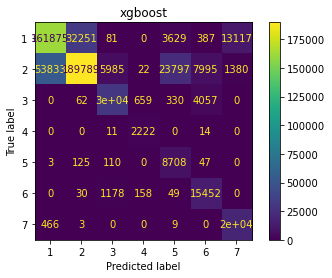

In [73]:
# evaluacija na trening setu
train_model_prediction = model.predict(X_train)
train_predictions = [round(value) for value in train_model_prediction]

accuracy = accuracy_score(y_train, train_predictions)
report = classification_report(y_train, train_predictions)
print(report)
print('Accuracy: ', accuracy)

fig, ax = plt.subplots()
plt.title('xgboost')
plot_confusion_matrix(model, X_train, y_train, ax=ax)
plt.show()

              precision    recall  f1-score   support

           1       0.78      0.76      0.77       500
           2       0.79      0.67      0.72       500
           3       0.89      0.83      0.86       500
           4       0.97      0.99      0.98       500
           5       0.89      0.97      0.93       500
           6       0.85      0.94      0.89       500
           7       0.94      0.97      0.95       500

    accuracy                           0.88      3500
   macro avg       0.87      0.88      0.87      3500
weighted avg       0.87      0.88      0.87      3500

Accuracy:  0.8757142857142857


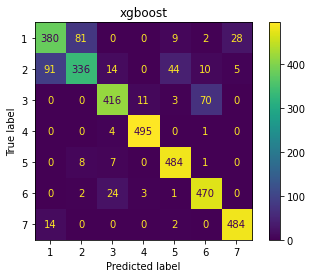

In [75]:
# evaluacija na test setu
test_model_prediction = model.predict(X_test)
test_predictions = [round(value) for value in test_model_prediction]

accuracy = accuracy_score(y_test, test_predictions)
report = classification_report(y_test, test_predictions)
print(report)
print('Accuracy: ', accuracy)

fig, ax = plt.subplots()
plt.title('xgboost')
plot_confusion_matrix(model, X_test, y_test, ax=ax)
plt.show()